In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import datetime
sb.set()

C:\Users\neo qi xiang\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Some Key Details
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

In [2]:
houseData = pd.read_csv('Melbourne_housing_FULL.csv')
houseData.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
houseData.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

## Missing data

In [4]:
houseData.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [5]:
#since price is the predictor for this data set. I shall drop this data
houseData_clean = houseData.dropna(subset = ["Price"])

In [6]:
houseData_clean.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Lattitude         6254
Longtitude        6254
Regionname           3
Propertycount        3
dtype: int64

In [7]:
#we need to convert the date sold to year sold after that we subtract year_sold with year built to get the age of the property
houseData_clean['Year_sold'] = pd.DatetimeIndex(houseData_clean['Date']).year

C:\Users\neo qi xiang\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
houseData_clean.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
Year_sold          int64
dtype: object

In [9]:
houseData_clean['sold_age'] = houseData_clean['Year_sold']-houseData_clean['YearBuilt']

C:\Users\neo qi xiang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
houseData_clean = houseData_clean.drop(columns = ['Year_sold','YearBuilt','Date'])

In [11]:
houseData_clean.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Distance             1
Postcode             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
CouncilArea          3
Lattitude         6254
Longtitude        6254
Regionname           3
Propertycount        3
sold_age         15163
dtype: int64

In [12]:
houseData_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27247 non-null  object 
 1   Address        27247 non-null  object 
 2   Rooms          27247 non-null  int64  
 3   Type           27247 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         27247 non-null  object 
 6   SellerG        27247 non-null  object 
 7   Distance       27246 non-null  float64
 8   Postcode       27246 non-null  float64
 9   Bedroom2       20806 non-null  float64
 10  Bathroom       20800 non-null  float64
 11  Car            20423 non-null  float64
 12  Landsize       17982 non-null  float64
 13  BuildingArea   10656 non-null  float64
 14  CouncilArea    27244 non-null  object 
 15  Lattitude      20993 non-null  float64
 16  Longtitude     20993 non-null  float64
 17  Regionname     27244 non-null  object 
 18  Proper

In [13]:
print(houseData_clean.select_dtypes(["object"]).columns) ## we need to convert these to categorical data

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [14]:
objdtype = houseData_clean.select_dtypes(["object"]).columns
houseData_clean[objdtype] = houseData_clean[objdtype].astype('category')

In [15]:
houseData_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         27247 non-null  category
 1   Address        27247 non-null  category
 2   Rooms          27247 non-null  int64   
 3   Type           27247 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         27247 non-null  category
 6   SellerG        27247 non-null  category
 7   Distance       27246 non-null  float64 
 8   Postcode       27246 non-null  float64 
 9   Bedroom2       20806 non-null  float64 
 10  Bathroom       20800 non-null  float64 
 11  Car            20423 non-null  float64 
 12  Landsize       17982 non-null  float64 
 13  BuildingArea   10656 non-null  float64 
 14  CouncilArea    27244 non-null  category
 15  Lattitude      20993 non-null  float64 
 16  Longtitude     20993 non-null  float64 
 17  Regionname     27244 non-null  

In [16]:
#post code should also be changed to categorical data
houseData_clean["Postcode"] = houseData_clean["Postcode"].astype('category')

In [17]:
# Percentage of missing values
houseData_clean.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Distance             1
Postcode             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
CouncilArea          3
Lattitude         6254
Longtitude        6254
Regionname           3
Propertycount        3
sold_age         15163
dtype: int64

In [18]:
houseData_clean = houseData_clean.reset_index(drop=True)
houseData_clean

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,sold_age
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,NaN
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,116.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,117.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0,NaN
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27242,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,NaN
27243,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,0.0
27244,Yarraville,147A Severn St,2,t,705000.0,S,Jas,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,18.0
27245,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,NaN


In [19]:
houseData_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27247 entries, 0 to 27246
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         27247 non-null  category
 1   Address        27247 non-null  category
 2   Rooms          27247 non-null  int64   
 3   Type           27247 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         27247 non-null  category
 6   SellerG        27247 non-null  category
 7   Distance       27246 non-null  float64 
 8   Postcode       27246 non-null  category
 9   Bedroom2       20806 non-null  float64 
 10  Bathroom       20800 non-null  float64 
 11  Car            20423 non-null  float64 
 12  Landsize       17982 non-null  float64 
 13  BuildingArea   10656 non-null  float64 
 14  CouncilArea    27244 non-null  category
 15  Lattitude      20993 non-null  float64 
 16  Longtitude     20993 non-null  float64 
 17  Regionname     27244 non-null  

In [20]:
#dropping the single digit data set wont affect too much
houseData_clean = houseData_clean.dropna(subset = ["Distance","Postcode","CouncilArea","Regionname","Propertycount"])

In [21]:
houseData_clean.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Distance             0
Postcode             0
Bedroom2          6438
Bathroom          6444
Car               6821
Landsize          9262
BuildingArea     16588
CouncilArea          0
Lattitude         6251
Longtitude        6251
Regionname           0
Propertycount        0
sold_age         15160
dtype: int64

In [22]:
def removechar(string):
    s = string.replace(" City Council" and " Shire Council","")
    return s
    

In [23]:
houseData_clean["CouncilArea"]= houseData_clean["CouncilArea"].apply(removechar)

C:\Users\neo qi xiang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Exploratory Data Analysis

In [24]:
df = houseData_clean

In [25]:
df['Suburb'].value_counts()

Reservoir          727
Bentleigh East     493
Richmond           439
Preston            415
Brunswick          387
                  ... 
Darley               1
Cranbourne East      1
Coldstream           1
viewbank             1
Fawkner Lot          0
Name: Suburb, Length: 345, dtype: int64

In [26]:
df['Regionname'].value_counts()

Southern Metropolitan         8524
Northern Metropolitan         7864
Western Metropolitan          5815
Eastern Metropolitan          3272
South-Eastern Metropolitan    1341
Northern Victoria              166
Eastern Victoria               166
Western Victoria                96
Name: Regionname, dtype: int64

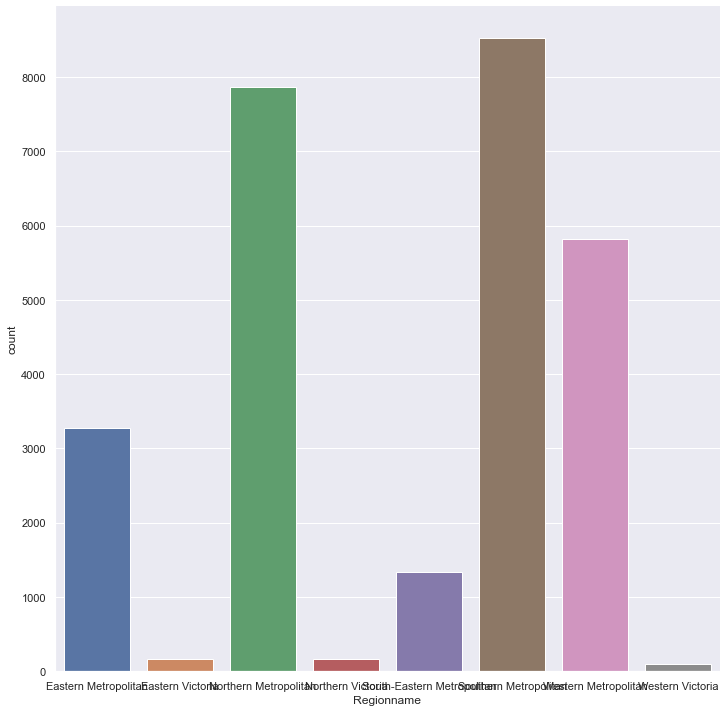

In [27]:
sb.catplot(x="Regionname", kind="count", data= df, height = 10);

## Type: 
br - bedroom(s);

h - house,cottage,villa, semi,terrace;

u - unit, duplex; 

t - townhouse; 

dev site - development site; 

o res - other residential.

In [28]:
df['Type'].value_counts()

h    18470
u     5908
t     2866
Name: Type, dtype: int64

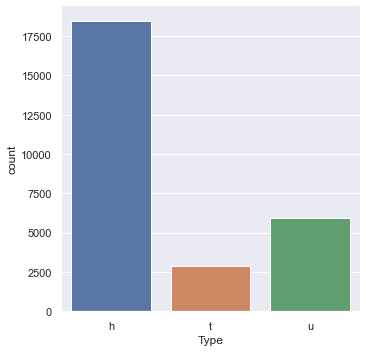

In [29]:
sb.catplot(x="Type", kind="count", data= df, height = 5); ##Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

In [30]:
df['CouncilArea'].value_counts()

Boroondara City Council           2520
Darebin City Council              2349
Moreland City Council             1790
Glen Eira City Council            1643
Moonee Valley City Council        1584
Melbourne City Council            1502
Banyule City Council              1457
Brimbank City Council             1366
Bayside City Council              1311
Maribyrnong City Council          1221
Hume City Council                 1036
Monash City Council               1007
Port Phillip City Council          952
Yarra City Council                 918
Stonnington City Council           884
Manningham City Council            842
Hobsons Bay City Council           799
Kingston City Council              735
Whittlesea City Council            709
Wyndham City Council               492
Whitehorse City Council            435
Maroondah City Council             356
Knox City Council                  287
Melton City Council                243
Frankston City Council             229
Greater Dandenong City Co

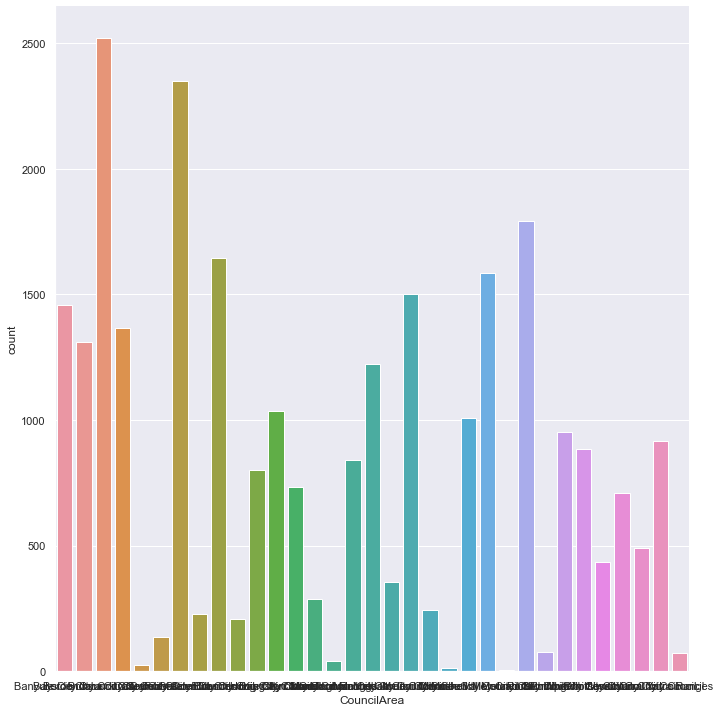

In [31]:
sb.catplot(x="CouncilArea", kind="count", data= df, height = 10);

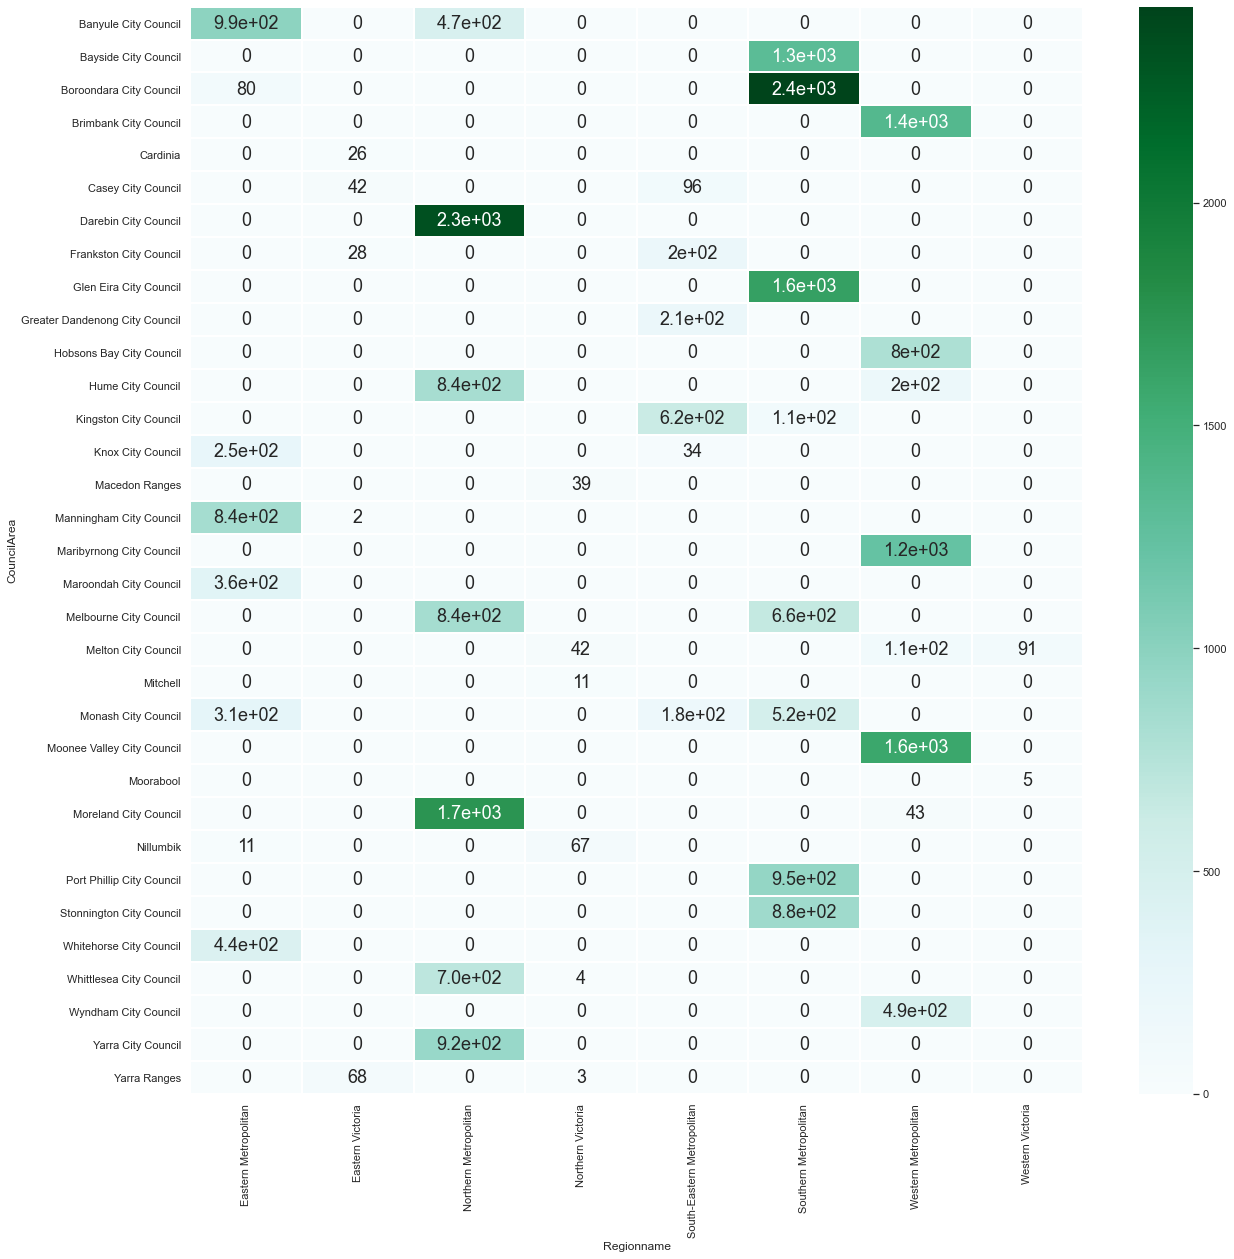

In [32]:
# Distribution of the Two Types
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(df.groupby(['CouncilArea', 'Regionname']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

In [33]:
n_df = df.select_dtypes(["int64","float64"]) #numerical data

(12.5, -0.5)

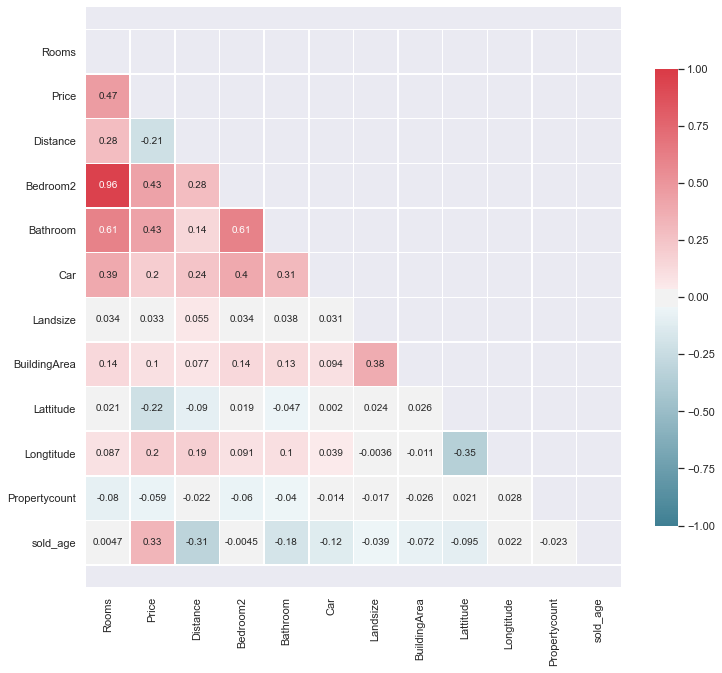

In [34]:
corr = n_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap= cmap,annot = True, vmax=1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.7})

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) ## to ensure that the graph is not cut off

In [35]:
houseData_clean = houseData_clean.drop(columns= ["Bedroom2"])

High correlation require to drop.

In [36]:
n_df['Price'].describe()

count    2.724400e+04
mean     1.050210e+06
std      6.414923e+05
min      8.500000e+04
25%      6.350000e+05
50%      8.700000e+05
75%      1.295000e+06
max      1.120000e+07
Name: Price, dtype: float64

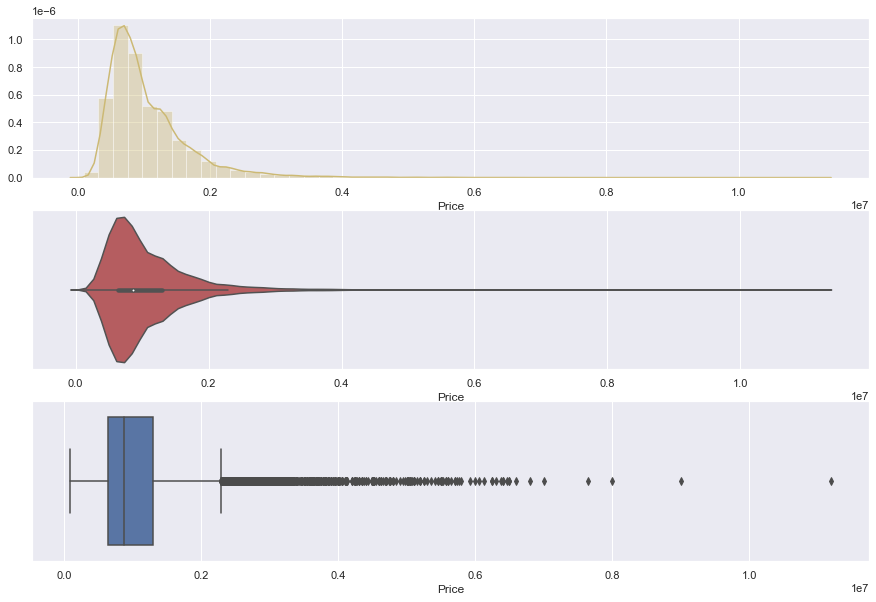

In [37]:
f, axes = plt.subplots(3, figsize=(15, 10))
sb.distplot(n_df['Price'], color = 'y',ax = axes[0])
sb.violinplot(n_df['Price'], color = 'r',ax = axes[1])
sb.boxplot(n_df['Price'], color = 'b', ax = axes[2])

In [38]:
n_df['BuildingArea'].describe()

count    10656.000000
mean       156.834586
std        449.222791
min          0.000000
25%        100.000000
50%        133.000000
75%        182.000000
max      44515.000000
Name: BuildingArea, dtype: float64

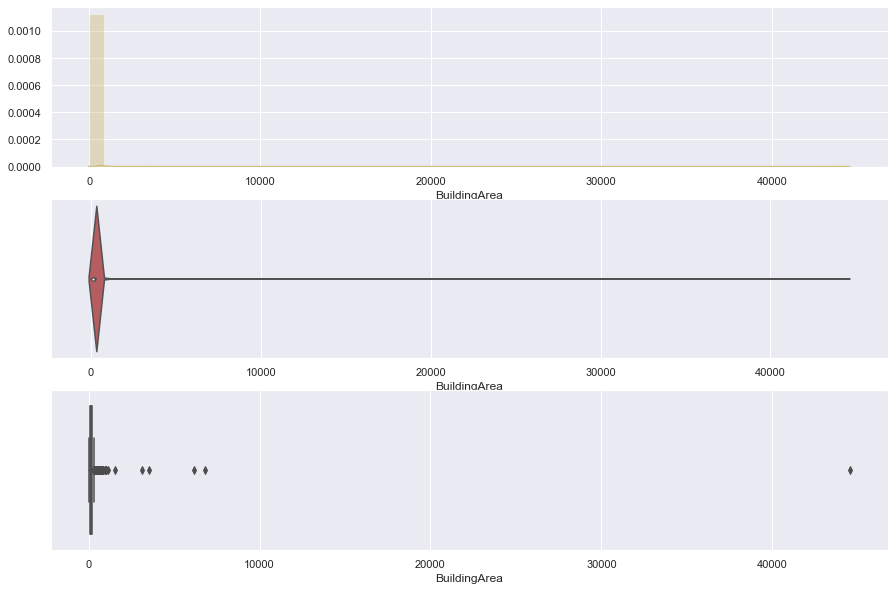

In [39]:

f, axes = plt.subplots(3, figsize=(15, 10))
sb.distplot(n_df['BuildingArea'], color = 'y',ax = axes[0])
sb.violinplot(n_df['BuildingArea'], color = 'r',ax = axes[1])
sb.boxplot(n_df['BuildingArea'], color = 'b', ax = axes[2])

In [40]:
n_df['BuildingArea'].describe()

count    10656.000000
mean       156.834586
std        449.222791
min          0.000000
25%        100.000000
50%        133.000000
75%        182.000000
max      44515.000000
Name: BuildingArea, dtype: float64

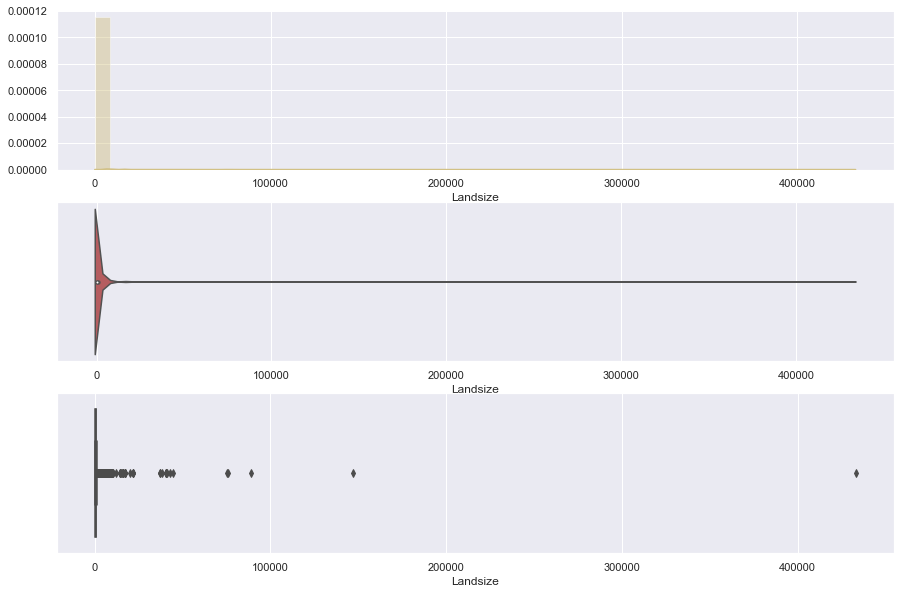

In [41]:
f, axes = plt.subplots(3, figsize=(15, 10))
sb.distplot(n_df['Landsize'], color = 'y',ax = axes[0])
sb.violinplot(n_df['Landsize'], color = 'r',ax = axes[1])
sb.boxplot(n_df['Landsize'], color = 'b', ax = axes[2])

These data are skewing heavily to the left, we need to normalise the price, we should also drop the anomaly data

## Price Prediction

In [42]:
houseData_clean = houseData_clean.reset_index()

In [43]:
houseData_clean

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,sold_age
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,3067.0,1.0,1.0,202.0,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,NaN
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067.0,1.0,0.0,156.0,79.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,116.0
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2.5,3067.0,2.0,0.0,134.0,150.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,117.0
3,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2.5,3067.0,2.0,1.0,94.0,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0,NaN
4,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2.5,3067.0,1.0,2.0,120.0,142.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27239,27242,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,6.3,3013.0,1.0,3.0,593.0,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,NaN
27240,27243,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,6.3,3013.0,2.0,1.0,98.0,104.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,0.0
27241,27244,Yarraville,147A Severn St,2,t,705000.0,S,Jas,6.3,3013.0,1.0,2.0,220.0,120.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,18.0
27242,27245,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,6.3,3013.0,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,NaN


In [44]:
houseData_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27244 entries, 0 to 27243
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   index          27244 non-null  int64   
 1   Suburb         27244 non-null  category
 2   Address        27244 non-null  category
 3   Rooms          27244 non-null  int64   
 4   Type           27244 non-null  category
 5   Price          27244 non-null  float64 
 6   Method         27244 non-null  category
 7   SellerG        27244 non-null  category
 8   Distance       27244 non-null  float64 
 9   Postcode       27244 non-null  category
 10  Bathroom       20800 non-null  float64 
 11  Car            20423 non-null  float64 
 12  Landsize       17982 non-null  float64 
 13  BuildingArea   10656 non-null  float64 
 14  CouncilArea    27244 non-null  category
 15  Lattitude      20993 non-null  float64 
 16  Longtitude     20993 non-null  float64 
 17  Regionname     27244 non-null  

In [45]:
from sklearn.impute import SimpleImputer
house_numerals = houseData_clean.select_dtypes(["int64","float64"])
house_cat = houseData_clean.select_dtypes(["category"])

In [46]:
house_cat.isnull().sum()

Suburb         0
Address        0
Type           0
Method         0
SellerG        0
Postcode       0
CouncilArea    0
Regionname     0
dtype: int64

In [47]:
house_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27244 entries, 0 to 27243
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Suburb       27244 non-null  category
 1   Address      27244 non-null  category
 2   Type         27244 non-null  category
 3   Method       27244 non-null  category
 4   SellerG      27244 non-null  category
 5   Postcode     27244 non-null  category
 6   CouncilArea  27244 non-null  category
 7   Regionname   27244 non-null  category
dtypes: category(8)
memory usage: 1.8 MB


In [48]:
house_cat

,Suburb,Address,Type,Method,SellerG,Postcode,CouncilArea,Regionname
0,Abbotsford,85 Turner St,h,S,Biggin,3067.0,Yarra City Council,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,h,S,Biggin,3067.0,Yarra City Council,Northern Metropolitan
2,Abbotsford,5 Charles St,h,SP,Biggin,3067.0,Yarra City Council,Northern Metropolitan
3,Abbotsford,40 Federation La,h,PI,Biggin,3067.0,Yarra City Council,Northern Metropolitan
4,Abbotsford,55a Park St,h,VB,Nelson,3067.0,Yarra City Council,Northern Metropolitan
...,...,...,...,...,...,...,...,...
27239,Yarraville,13 Burns St,h,PI,Jas,3013.0,Maribyrnong City Council,Western Metropolitan
27240,Yarraville,29A Murray St,h,SP,Sweeney,3013.0,Maribyrnong City Council,Western Metropolitan
27241,Yarraville,147A Severn St,t,S,Jas,3013.0,Maribyrnong City Council,Western Metropolitan
27242,Yarraville,12/37 Stephen St,h,SP,hockingstuart,3013.0,Maribyrnong City Council,Western Metropolitan


In [49]:
house_test = house_numerals.copy()

In [50]:
# make new columns indicating what will be imputed
cols_with_missing = (col for col in house_test.columns 
                                 if house_test[col].isnull().any())

for col in cols_with_missing:
    house_test[col + '_was_missing'] = house_test[col].isnull()

In [51]:
house_test

,index,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,sold_age,Bathroom_was_missing,Car_was_missing,Landsize_was_missing,BuildingArea_was_missing,Lattitude_was_missing,Longtitude_was_missing,sold_age_was_missing
0,0,2,1480000.0,2.5,1.0,1.0,202.0,NaN,-37.79960,144.99840,4019.0,NaN,False,False,False,True,False,False,True
1,1,2,1035000.0,2.5,1.0,0.0,156.0,79.0,-37.80790,144.99340,4019.0,116.0,False,False,False,False,False,False,False
2,2,3,1465000.0,2.5,2.0,0.0,134.0,150.0,-37.80930,144.99440,4019.0,117.0,False,False,False,False,False,False,False
3,3,3,850000.0,2.5,2.0,1.0,94.0,NaN,-37.79690,144.99690,4019.0,NaN,False,False,False,True,False,False,True
4,4,4,1600000.0,2.5,1.0,2.0,120.0,142.0,-37.80720,144.99410,4019.0,2.0,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27239,27242,4,1480000.0,6.3,1.0,3.0,593.0,NaN,-37.81053,144.88467,6543.0,NaN,False,False,False,True,False,False,True
27240,27243,2,888000.0,6.3,2.0,1.0,98.0,104.0,-37.81551,144.88826,6543.0,0.0,False,False,False,False,False,False,False
27241,27244,2,705000.0,6.3,1.0,2.0,220.0,120.0,-37.82286,144.87856,6543.0,18.0,False,False,False,False,False,False,False
27242,27245,3,1140000.0,6.3,NaN,NaN,NaN,NaN,NaN,NaN,6543.0,NaN,True,True,True,True,True,True,True


In [52]:
# Imputation
my_imputer = SimpleImputer()
house_test1 = pd.DataFrame(my_imputer.fit_transform(house_test))
house_test1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,2.0,1480000.0,2.5,1.000000,1.00000,202.000000,156.834586,-37.799600,144.998400,4019.0,50.159467,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,2.0,1035000.0,2.5,1.000000,0.00000,156.000000,79.000000,-37.807900,144.993400,4019.0,116.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,3.0,1465000.0,2.5,2.000000,0.00000,134.000000,150.000000,-37.809300,144.994400,4019.0,117.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,3.0,850000.0,2.5,2.000000,1.00000,94.000000,156.834586,-37.796900,144.996900,4019.0,50.159467,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,4.0,4.0,1600000.0,2.5,1.000000,2.00000,120.000000,142.000000,-37.807200,144.994100,4019.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27239,27242.0,4.0,1480000.0,6.3,1.000000,3.00000,593.000000,156.834586,-37.810530,144.884670,6543.0,50.159467,0.0,0.0,0.0,1.0,0.0,0.0,1.0
27240,27243.0,2.0,888000.0,6.3,2.000000,1.00000,98.000000,104.000000,-37.815510,144.888260,6543.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27241,27244.0,2.0,705000.0,6.3,1.000000,2.00000,220.000000,120.000000,-37.822860,144.878560,6543.0,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27242,27245.0,3.0,1140000.0,6.3,1.591683,1.71537,593.488933,156.834586,-37.806963,144.996711,6543.0,50.159467,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [53]:
house_test1.columns = house_test.columns

In [54]:
house_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27244 entries, 0 to 27243
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     27244 non-null  float64
 1   Rooms                     27244 non-null  float64
 2   Price                     27244 non-null  float64
 3   Distance                  27244 non-null  float64
 4   Bathroom                  27244 non-null  float64
 5   Car                       27244 non-null  float64
 6   Landsize                  27244 non-null  float64
 7   BuildingArea              27244 non-null  float64
 8   Lattitude                 27244 non-null  float64
 9   Longtitude                27244 non-null  float64
 10  Propertycount             27244 non-null  float64
 11  sold_age                  27244 non-null  float64
 12  Bathroom_was_missing      27244 non-null  float64
 13  Car_was_missing           27244 non-null  float64
 14  Landsi

In [55]:
house_test1.isnull().sum()

index                       0
Rooms                       0
Price                       0
Distance                    0
Bathroom                    0
Car                         0
Landsize                    0
BuildingArea                0
Lattitude                   0
Longtitude                  0
Propertycount               0
sold_age                    0
Bathroom_was_missing        0
Car_was_missing             0
Landsize_was_missing        0
BuildingArea_was_missing    0
Lattitude_was_missing       0
Longtitude_was_missing      0
sold_age_was_missing        0
dtype: int64

In [56]:
house_test1['Price'] = house_test1['Price'].apply(np.log)

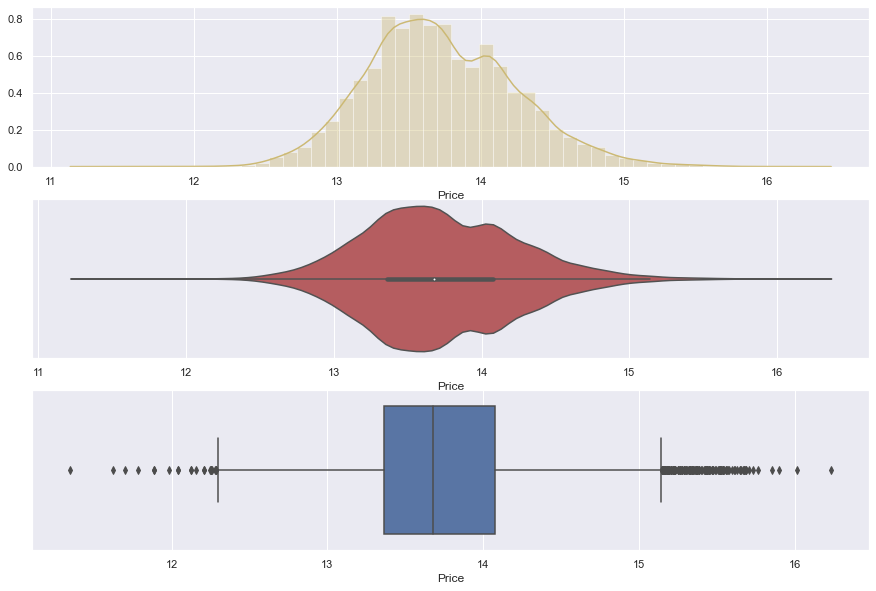

In [57]:
f, axes = plt.subplots(3, figsize=(15, 10))
sb.distplot(house_test1['Price'], color = 'y',ax = axes[0])
sb.violinplot(house_test1['Price'], color = 'r',ax = axes[1])
sb.boxplot(house_test1['Price'], color = 'b', ax = axes[2])

In [58]:
from sklearn import preprocessing
standardize = preprocessing.StandardScaler()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
ridge = RidgeCV(alphas=[0.001, 0.01, 0.1, 1.0, 2.0, 3.0])
lasso = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 2.0, 3.0], max_iter = 1000)
linreg = LinearRegression()

In [59]:
cmp_dict = {'Linear':[],
            'Ridge':[],
            'Lasso':[],
            'Linear_Dummies':[],
            'Ridge_Dummies':[],
            'Lasso_Dummies':[]}

Accuracy/Explained variance 	: 0.41033306688295906
MSE				: 0.15290073730685402


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

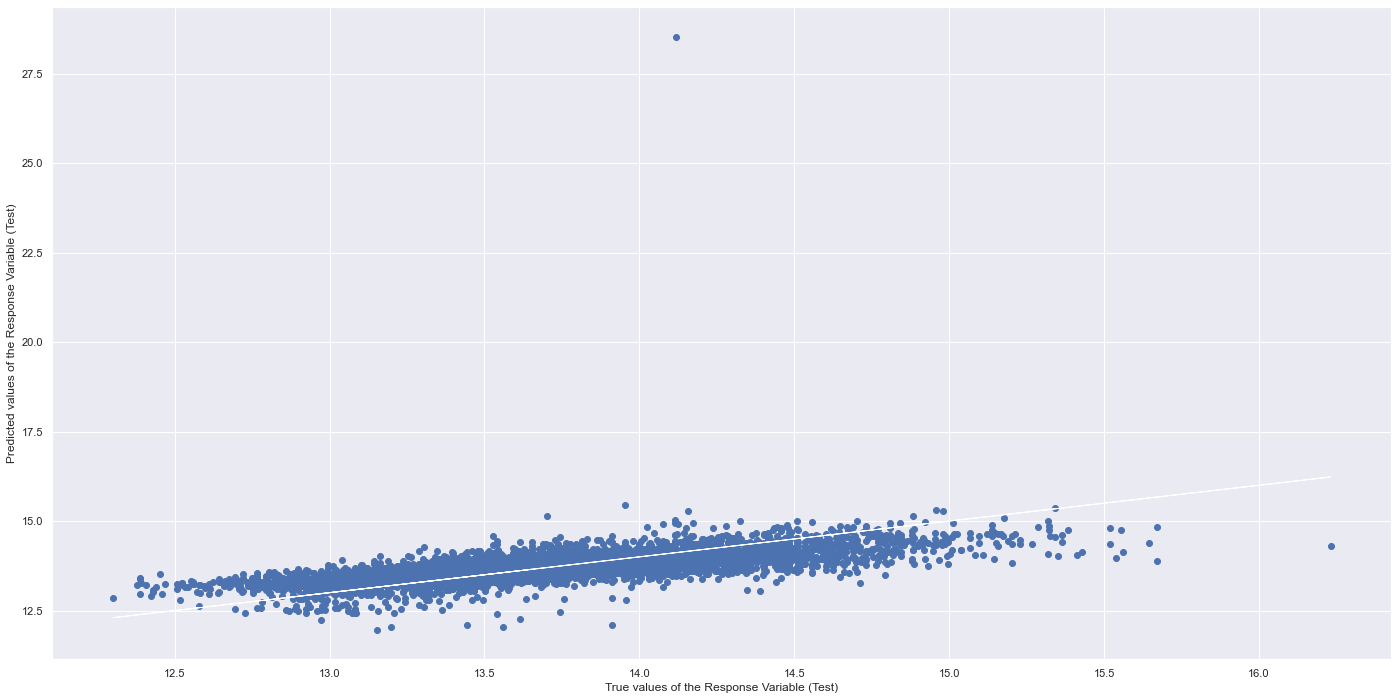

In [60]:
predictor = house_test1.drop(columns = 'Price')
result = house_test1['Price']
X_train, X_test, y_train, y_test = train_test_split(predictor, result, test_size=0.2, random_state=0)
linreg.fit(X_train, y_train)
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

cmp_dict['Linear'].append(linreg.score(X_train, y_train))
cmp_dict['Linear'].append(mean_squared_error(y_train, y_train_pred))
cmp_dict['Linear'].append(linreg.score(X_test, y_test))
cmp_dict['Linear'].append(mean_squared_error(y_test, y_test_pred))

print("Accuracy/Explained variance \t:", linreg.score(X_test, y_test))
print('MSE\t\t\t\t:', mean_squared_error(y_test, y_test_pred))

f, axes = plt.subplots(figsize=(24, 12))
axes.scatter(y_test, y_test_pred)
axes.plot(y_test, y_test, 'w-', linewidth = 1)
axes.set_xlabel("True values of the Response Variable (Test)")
axes.set_ylabel("Predicted values of the Response Variable (Test)")

Accuracy/Explained variance 	: 0.40965829526055714
MSE				: 0.15307570570474877
Alpha selected			: 3.0


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

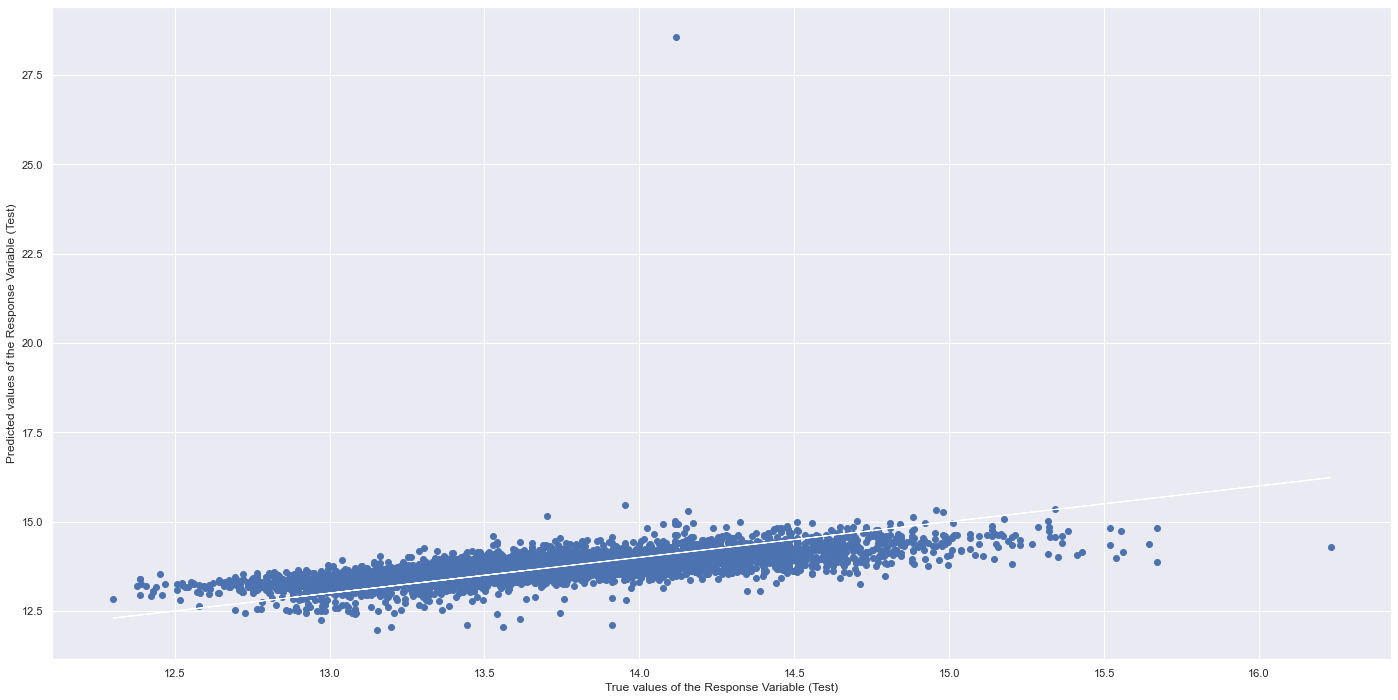

In [61]:
predictor = house_test1.drop(columns = 'Price')
result = house_test1['Price']
X_train, X_test, y_train, y_test = train_test_split(predictor, result, test_size=0.2, random_state=0)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print("Accuracy/Explained variance \t:", ridge.score(X_test, y_test))
print('MSE\t\t\t\t:', mean_squared_error(y_test, y_test_pred))
print('Alpha selected\t\t\t:', ridge.alpha_)

cmp_dict['Ridge'].append(ridge.score(X_train, y_train))
cmp_dict['Ridge'].append(mean_squared_error(y_train, y_train_pred))
cmp_dict['Ridge'].append(ridge.score(X_test, y_test))
cmp_dict['Ridge'].append(mean_squared_error(y_test, y_test_pred))

f, axes = plt.subplots(figsize=(24, 12))
axes.scatter(y_test, y_test_pred)
axes.plot(y_test, y_test, 'w-', linewidth = 1)
axes.set_xlabel("True values of the Response Variable (Test)")
axes.set_ylabel("Predicted values of the Response Variable (Test)")

C:\Users\neo qi xiang\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy/Explained variance 	: 0.39818855435086997
MSE				: 0.15604981149789432
Alpha selected			: 0.001


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

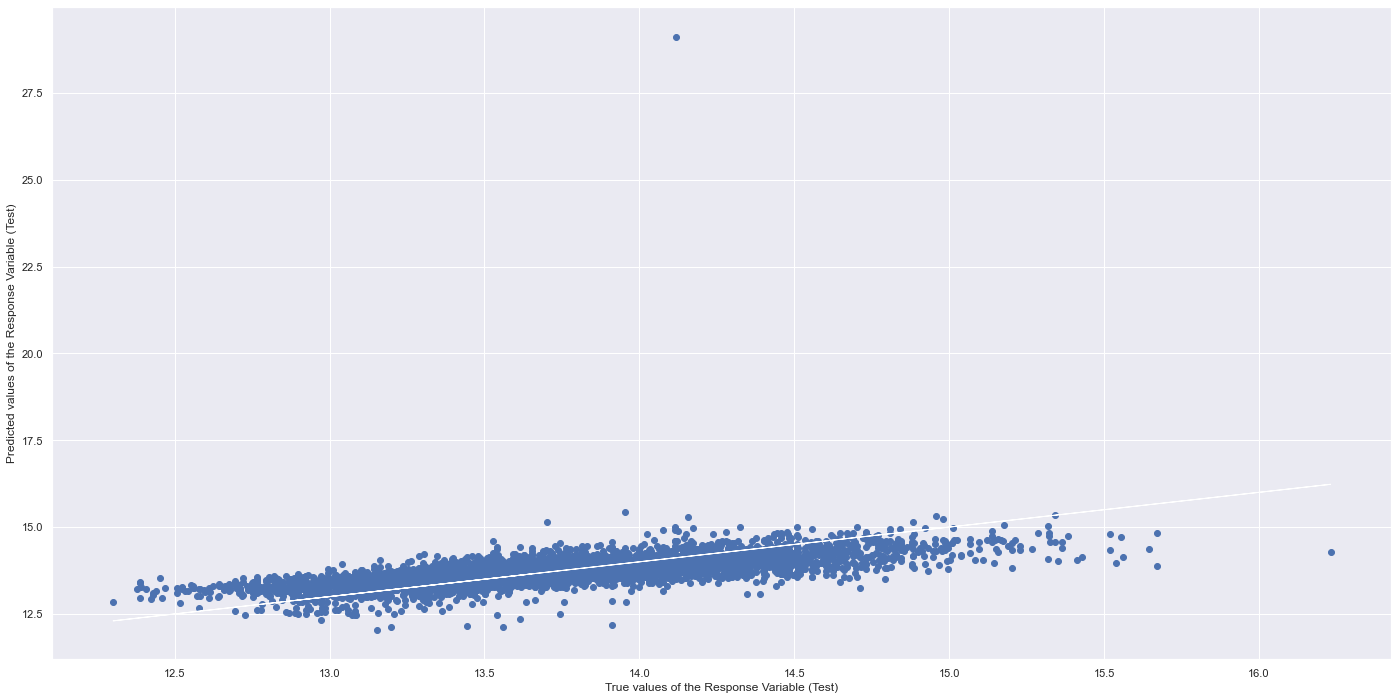

In [64]:
predictor = house_test1.drop(columns = 'Price')
result = house_test1['Price']

X_train, X_test, y_train, y_test = train_test_split(predictor, result, test_size=0.2, random_state=0)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Accuracy/Explained variance \t:", lasso.score(X_test, y_test))
print('MSE\t\t\t\t:', mean_squared_error(y_test, y_test_pred))
print('Alpha selected\t\t\t:', lasso.alpha_)

cmp_dict['Lasso'].append(lasso.score(X_train, y_train))
cmp_dict['Lasso'].append(mean_squared_error(y_train, y_train_pred))
cmp_dict['Lasso'].append(lasso.score(X_test, y_test))
cmp_dict['Lasso'].append(mean_squared_error(y_test, y_test_pred))

f, axes = plt.subplots(figsize=(24, 12))
axes.scatter(y_test, y_test_pred)
axes.plot(y_test, y_test, 'w-', linewidth = 1)
axes.set_xlabel("True values of the Response Variable (Test)")
axes.set_ylabel("Predicted values of the Response Variable (Test)")

To include the categorical data- change it into dummies then add in 

In [65]:
df_dummies = pd.get_dummies(house_cat, drop_first=True)
df_dummies

,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
27240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
27241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
27242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [66]:
house_test3 = pd.concat([house_test1, df_dummies], ignore_index=True)
house_test3

MemoryError: 